In [34]:
import sys

import river.cluster as rcluster
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from clustpy.partition import XMeans
from sklearn.cluster import KMeans, HDBSCAN
from dbhd_clustering.DBHDALGO import DBHD
from clustpy.metrics import unsupervised_clustering_accuracy, PairCountingScores
from river import metrics as rmetrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from evaluate import printMetrics 
from datahandler import load_data

import dp_clustream

(1000, 2)
1000


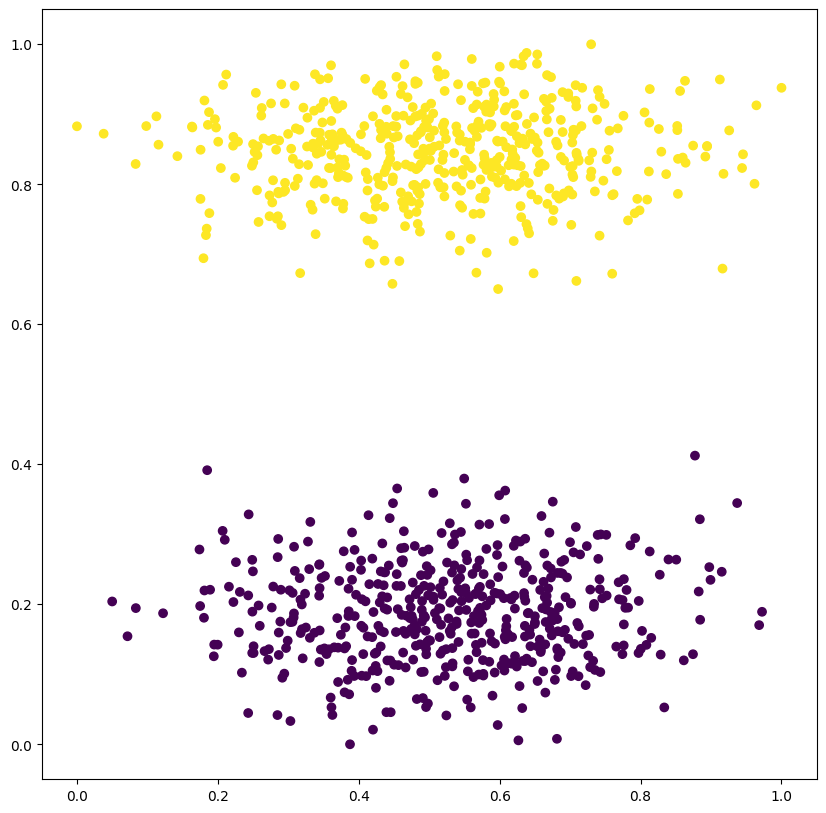

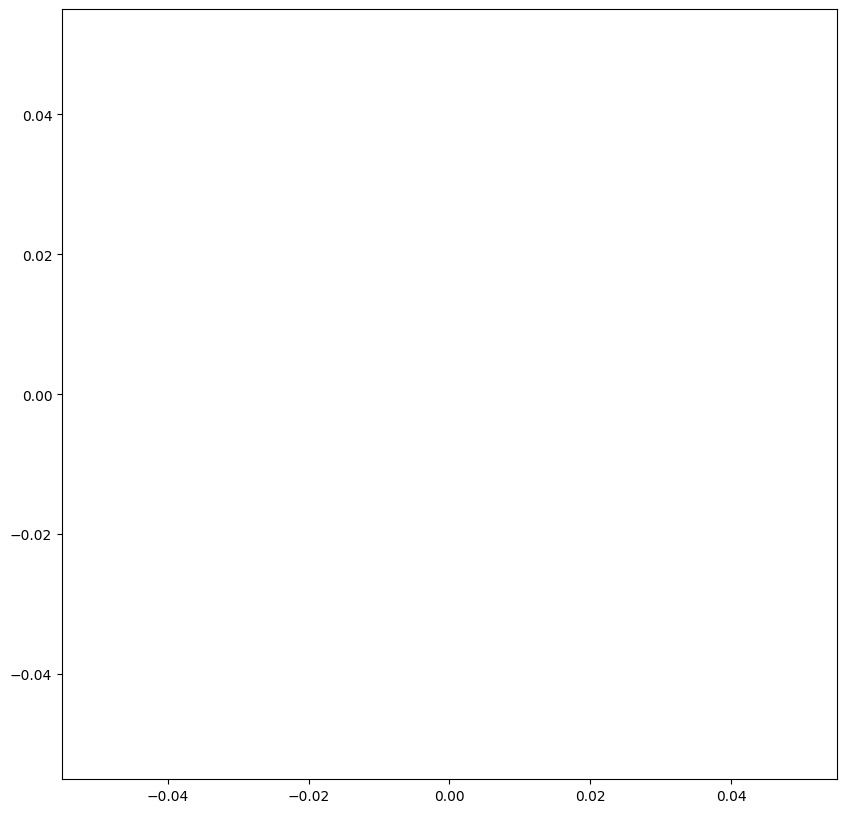

In [112]:
X, y = load_data("long1", "artificial", 0)
print(X.shape)
print(len(y))
c = 1000
X_test = X[c:]
y_test = y[c:]
X = X[:c]
y = y[:c]
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

In [113]:
clustream = dp_clustream.DensityPeak_CluStream(n_macro_clusters=10, max_micro_clusters=100, sigma=0.5, mu=0.5)
for x, label in zip(X,y):
	dp = dict(enumerate(x))
	clustream.learn_one(dp)
clustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = clustream.predict_one(dp)
	clustream_labels_train.append(pred)
clustream_labels_test = []
for x in X_test:
	dp = dict(enumerate(x))
	pred = clustream.predict_one(dp)
	clustream_labels_test.append(pred)

In [114]:
clustream_centers = clustream.centers
print(clustream_centers)
clustream_mcs = clustream.micro_clusters
print(clustream_mcs)

{0: defaultdict(..., {0: 1.4571141805397716, 1: 0.22962105069115613}), 1: defaultdict(..., {0: 0.39135206572184006, 1: 0.874822531136026}), 2: defaultdict(..., {0: 0.7966642701805879, 1: 0.8978536344752935}), 3: defaultdict(..., {0: 0.527202372421673, 1: 0.8225913709233696}), 4: defaultdict(..., {0: 1.188966602812151, 1: 1.0843023892117567}), 5: defaultdict(..., {0: 0.29139230042823794, 1: 0.2167839471986842}), 6: defaultdict(..., {0: 0.586793416928689, 1: 0.1530662990790225}), 7: defaultdict(..., {0: 1.150420709611411, 1: 1.2795916940490089}), 8: defaultdict(..., {0: 1.4871897352015673, 1: -0.5135230106337525}), 9: defaultdict(..., {0: 0.7551592153874536, 1: -0.15626141253500703})}
{0: CluStreamMicroCluster (
  x={0: 0.3875595150484803, 1: 0.0}
  w=1.
  timestamp=712
), 1: CluStreamMicroCluster (
  x={0: 0.9163026994487986, 1: 0.6795609535601281}
  w=1.
  timestamp=501
), 2: CluStreamMicroCluster (
  x={0: 0.8771860772409825, 1: 0.4123728291701878}
  w=1.
  timestamp=477
), 3: CluStre

In [115]:
clustream_centers = []
for key in clustream.centers.keys():
	center = clustream.centers[key]
	clustream_centers.append([center[0], center[1], key])
clustream_centers = np.array(clustream_centers)

In [116]:
clustream_mcs = []
for mc_key in clustream.micro_clusters.keys():
	mc = clustream.micro_clusters[mc_key]
	mccenter = mc.center
	clustream_mcs.append([mccenter[0], mccenter[1], mc.radius(1), mc.weight])
clustream_mcs = np.array(clustream_mcs)

clustream_mcs2 = []
for mc_key in clustream.micro_clusters.keys():
	mc = clustream.micro_clusters[mc_key]
	mccenter = mc.center
	clustream_mcs2.append([mccenter.get(0,0), mccenter.get(1,0), mc.radius(1), mc.weight])
clustream_mcs2 = np.array(clustream_mcs)

In [117]:
for i in range(len(clustream_mcs)):
	print(clustream_mcs[i], clustream_mcs2[i])


[0.38755952 0.         0.         1.        ] [0.38755952 0.         0.         1.        ]
[0.9163027  0.67956095 0.         1.        ] [0.9163027  0.67956095 0.         1.        ]
[0.89946071 0.35948701 0.03999603 3.        ] [0.89946071 0.35948701 0.03999603 3.        ]
[0.30248735 0.29013308 0.02160362 4.        ] [0.30248735 0.29013308 0.02160362 4.        ]
[0.20961452 0.94936423 0.00679514 2.        ] [0.20961452 0.94936423 0.00679514 2.        ]
[0.18483361 0.3915499  0.         1.        ] [0.18483361 0.3915499  0.         1.        ]
[0.36124754 0.05284411 0.         1.        ] [0.36124754 0.05284411 0.         1.        ]
[0.41383329 0.32723699 0.         1.        ] [0.41383329 0.32723699 0.         1.        ]
[0.15903149 0.84473498 0.01488644 2.        ] [0.15903149 0.84473498 0.01488644 2.        ]
[0.10897297 0.87892267 0.01493782 3.        ] [0.10897297 0.87892267 0.01493782 3.        ]
[0.36568525 0.26516282 0.02349807 9.        ] [0.36568525 0.26516282 0.02349807 

In [118]:
print(printMetrics(y,clustream_labels_train))
print(printMetrics(y_test, clustream_labels_test))

    0   1     2     3     5     6     9  
0   0     0     0     0   148   351   1  
1   0   188   113   199     0     0   0  
2   0     0     0     0     0     0   0  
3   0     0     0     0     0     0   0  
5   0     0     0     0     0     0   0  
6   0     0     0     0     0     0   0  
9   0     0     0     0     0     0   0  
Acc: 0.55 NMI: 0.621053572161083 ARI: 0.46481801618750496 AMI: 0.6201343892053615 Pur.: 1.0 Prec.: 1.0 Rec.: 0.4645691382765531 F1: 0.634410661996114 Comp.: 0.4503826686975776 Fowl.: 0.681593088489425 Homo.: 1.0 Clu.Num.: 6 True Clu.Num 2


ZeroDivisionError: division by zero

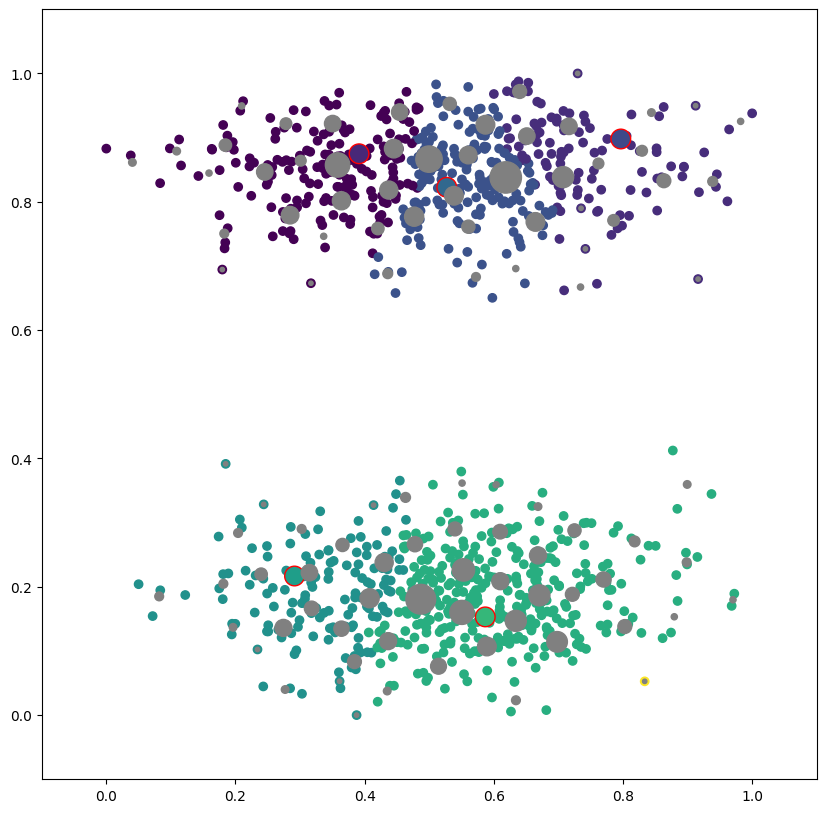

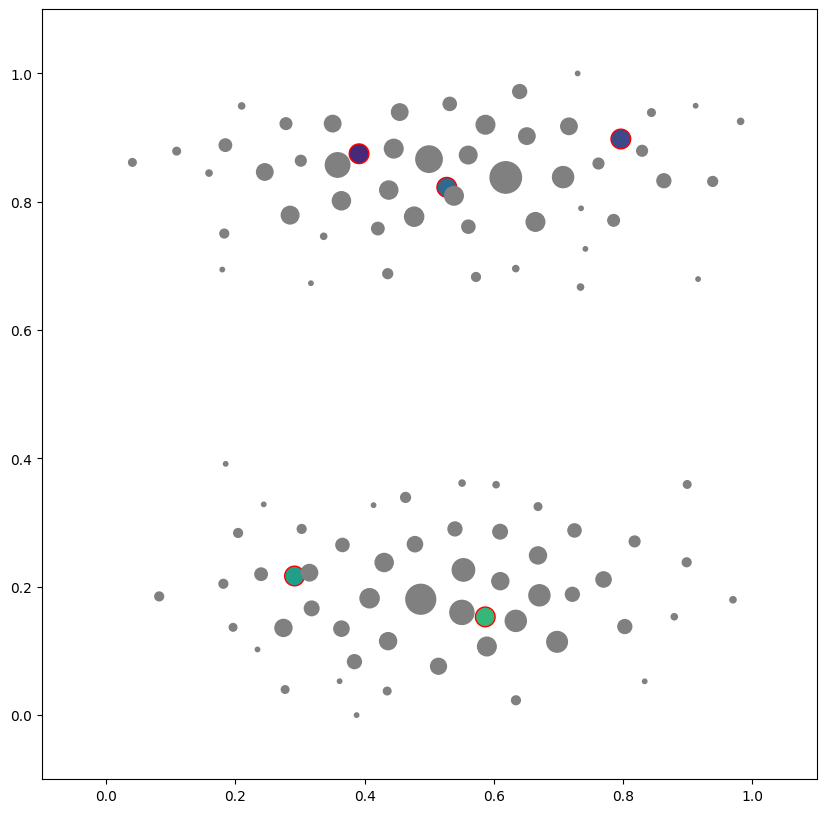

In [119]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=clustream_labels_train)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=clustream_centers[:,2], s= 200, edgecolors='red')
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3]*10)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=clustream_labels_test)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=clustream_centers[:,2], s= 200,  edgecolors='red')
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3]*10)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

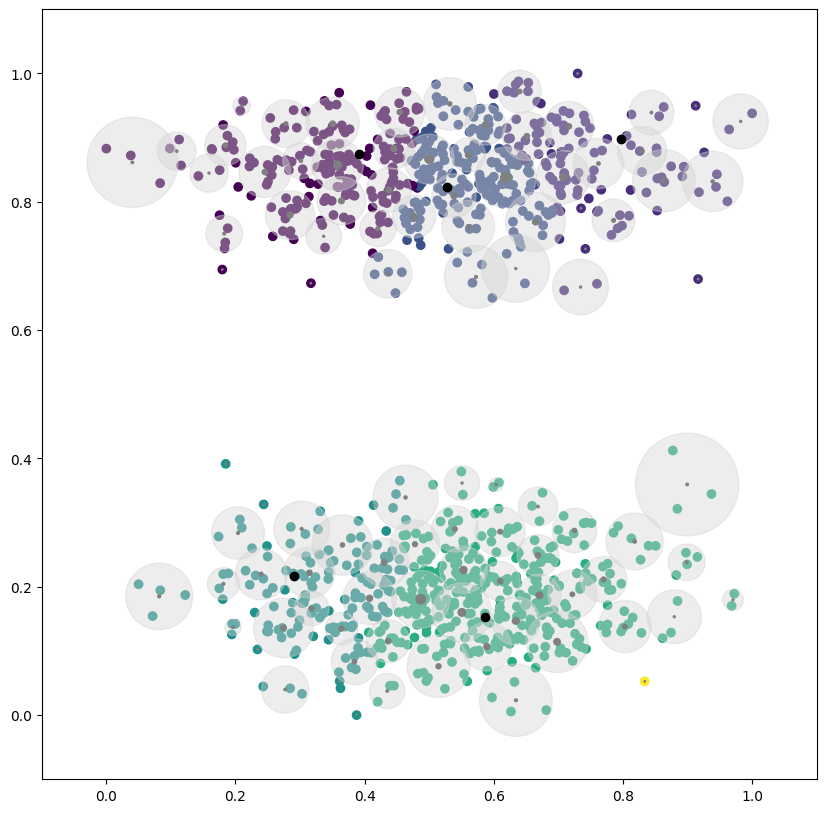

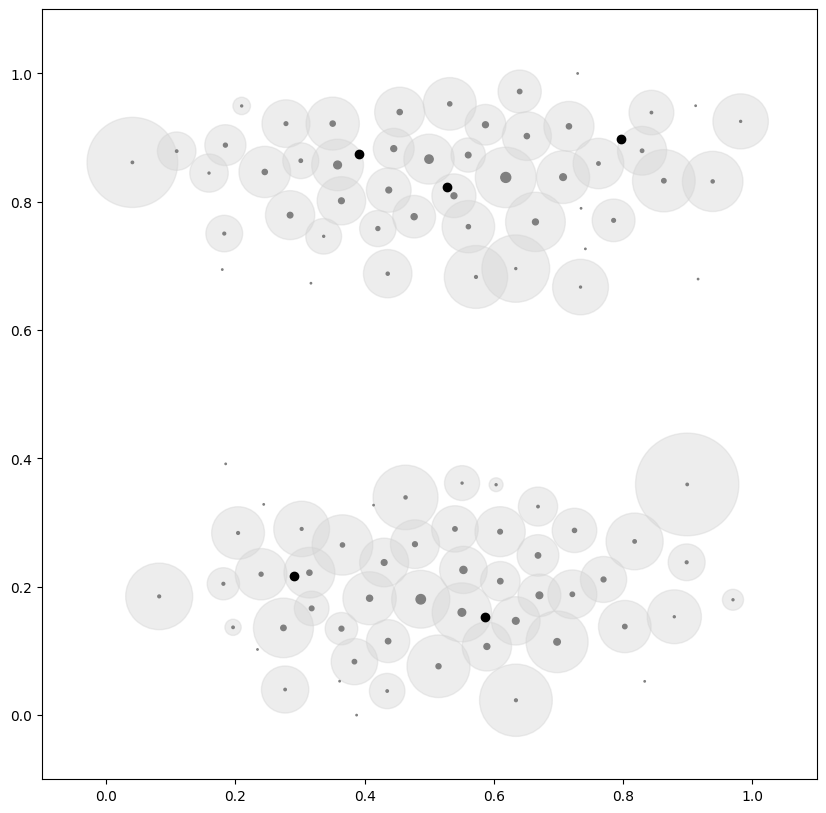

In [120]:
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=clustream_labels_train)
for mc in clustream_mcs:
	mc_patch = ptc.Circle((mc[0],mc[1]), 2* mc[2], alpha= 0.4, color="lightgrey")
	plt.gca().add_patch(mc_patch)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c="black")
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3])
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=clustream_labels_test)
for mc in clustream_mcs:
	mc_patch = ptc.Circle((mc[0],mc[1]), 2* mc[2], alpha= 0.4, color="lightgrey")
	plt.gca().add_patch(mc_patch)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c="black")
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3])
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

In [121]:
def random_ball_num(center, radius, d, n, clunum):
    d = int(d)
    n = int(n)
    u = np.random.normal(0, 1, (n, d + 1))  # an array of d normally distributed random variables
    norm = np.sqrt(np.sum(u ** 2, 1))
    r = np.random.random(n) ** (1.0 / d)
    normed = np.divide(u, norm[:, None])
    x = r[:, None] * normed
    x[:, :-1] = center + x[:, :-1] * radius
    x[:, -1] = clunum
    #print(center, radius, d, n, clunum)
    return x

In [55]:
new_ds = []
i = 0
for mc in clustream_mcs:
	new_dps = random_ball_num([mc[0], mc[1]], 2*mc[2], 2, mc[3]*10, i)
	#print(new_dps)
	for j in range(int(mc[3])):
		#print(new_dps[j])
		new_ds.append(new_dps[j])
	i += 1
new_ds = np.array(new_ds)
print(new_ds)

[[ 0.59855     0.391985    0.        ]
 [ 0.611715    0.66656     1.        ]
 [ 0.31011     0.96254     2.        ]
 ...
 [ 0.55411861  0.40360568 99.        ]
 [ 0.54515766  0.41564383 99.        ]
 [ 0.54905164  0.40520266 99.        ]]


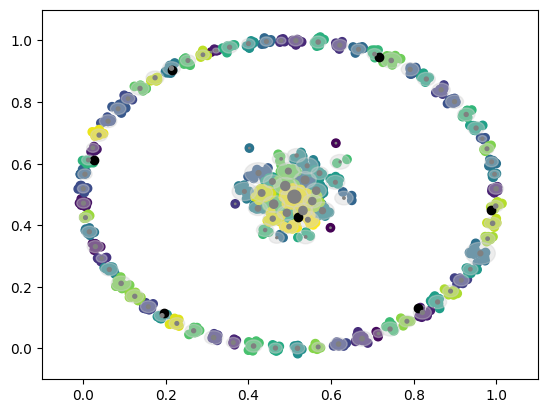

In [56]:
plt.scatter(new_ds[:, 0], new_ds[:, 1], c=new_ds[:, 2])
for mc in clustream_mcs:
	mc_patch = ptc.Circle((mc[0],mc[1]), 2* mc[2], alpha= 0.4, color="lightgrey")
	plt.gca().add_patch(mc_patch)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c="black")
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3])
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

C:\Users\Philipp-LMU\Workspaces\streaming_clustream\venvClu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Philipp-LMU\Workspaces\streaming_clustream\venvClu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


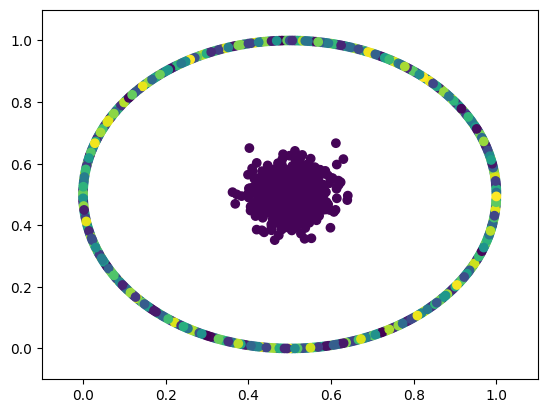

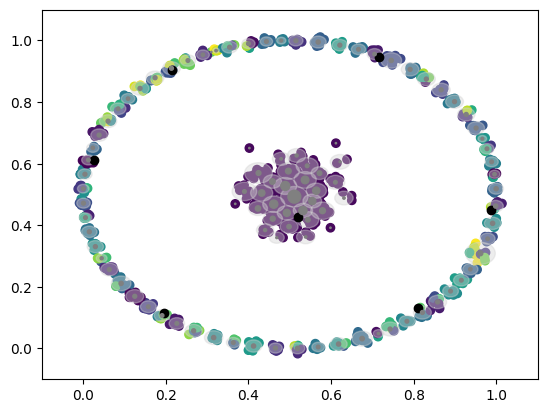

In [57]:
xmeans = XMeans()
xmeans_trueclustering = xmeans.fit_predict(X, y)
plt.scatter(X[:, 0], X[:, 1], c=xmeans_trueclustering)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()
xmeans = XMeans()
xmeans_offclustering = xmeans.fit_predict(new_ds[:, 0:2], new_ds[:, 2])
plt.scatter(new_ds[:, 0], new_ds[:, 1], c=xmeans_offclustering)
for mc in clustream_mcs:
	mc_patch = ptc.Circle((mc[0],mc[1]), 2* mc[2], alpha= 0.4, color="lightgrey")
	plt.gca().add_patch(mc_patch)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c="black")
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3])
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

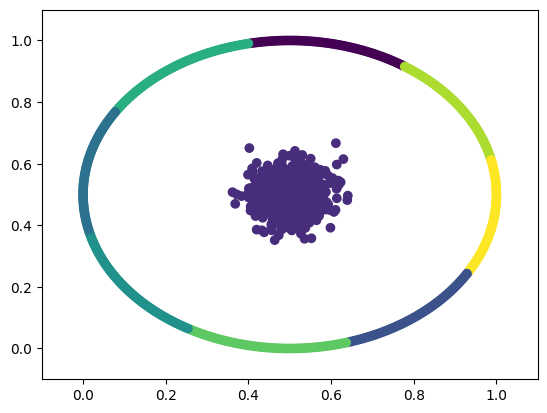

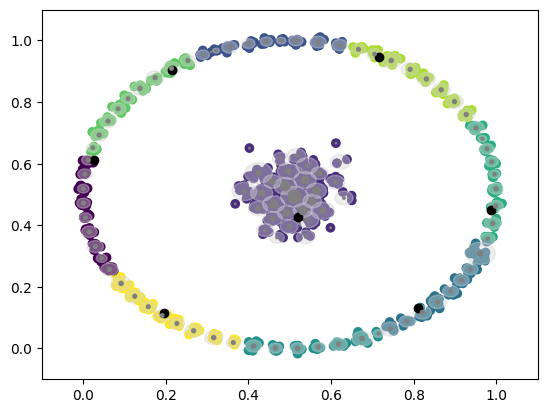

In [58]:
kmeans = KMeans(n_clusters=9)
kmeans_trueclustering = kmeans.fit_predict(X, y)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_trueclustering)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()
kmeans = KMeans(n_clusters=9)
kmeans_offclustering = kmeans.fit_predict(new_ds[:, 0:2], new_ds[:, 2])
plt.scatter(new_ds[:, 0], new_ds[:, 1], c=kmeans_offclustering)
for mc in clustream_mcs:
	mc_patch = ptc.Circle((mc[0],mc[1]), 2* mc[2], alpha= 0.4, color="lightgrey")
	plt.gca().add_patch(mc_patch)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c="black")
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3])
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

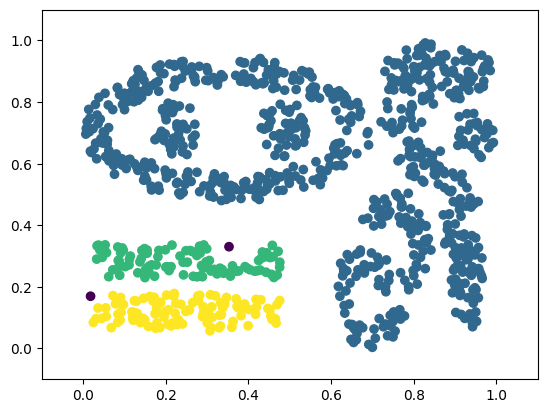

[-1 44 44 -1 -1 -1 -1 44 -1 -1 -1  7  2  2  2 24 24 24 24 24 24 24 24 24
 24 -1 -1 -1 -1 -1  2  2  2  2  2  2 -1 26 26 26 26 26 26 26 26 26 26 26
 26  2  2 12 12 12 12 12 12 12 12 12 12 12 35 35 -1 -1 -1 36 -1 -1 -1 -1
 -1 -1 -1 25 25 25 -1 -1 25 25 -1 -1 26 -1 -1 43 42 -1 -1 42 11 11 12 -1
 -1 11 11 11 -1 15 15 15 15 15 15 15 15 15 15 41 41 41 41 -1 41 41 41 41
 41 41 41 41 25 25 25 25 25 25 25 25 25 25 25  1  1  1  1  1  1  1  1  1
  1 42 42 42 42 42 -1 42  2  2  2  2  2  2  2  2 -1 -1 26 -1 26  6  6  6
  6  6  6  6  6  6  6  6 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 34 34 34 34 34 34 34
 34 34 -1  4  4  4  4  4  4  4  4  4  4  4  4 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 -1  2  2  2  2  5  5  5  5  5  5  5  5  5  5 -1 34 -1
 -1 -1 34 45 45 45 45 45 -1 -1 45 45 45 45  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  9  9  9  9

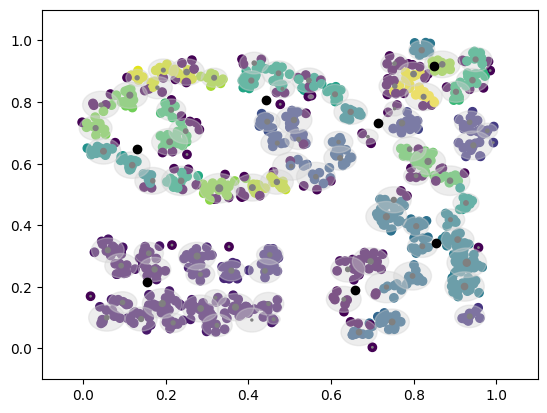

In [79]:
hdbscan = HDBSCAN()
hdbscan_trueclustering = hdbscan.fit_predict(X, y)
plt.scatter(X[:, 0], X[:, 1], c=hdbscan_trueclustering)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

hdbscan = HDBSCAN()
hdbscan_offclustering = hdbscan.fit_predict(new_ds[:, 0:2], new_ds[:, 2])
plt.scatter(new_ds[:, 0], new_ds[:, 1], c=hdbscan_offclustering)
print(hdbscan_offclustering)
for mc in clustream_mcs:
	mc_patch = ptc.Circle((mc[0],mc[1]), 2* mc[2], alpha= 0.4, color="lightgrey")
	plt.gca().add_patch(mc_patch)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c="black")
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3])
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

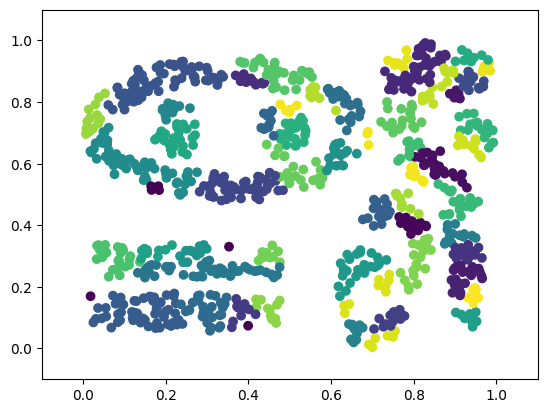

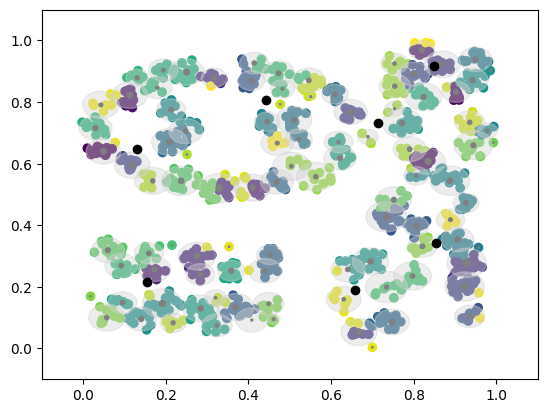

In [81]:
dbhd = DBHD(min_cluster_size=10)
dbhd_trueclustering = dbhd.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=dbhd_trueclustering)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

dbhd = DBHD(min_cluster_size=10)
dbhd_offclustering = dbhd.fit_predict(new_ds[:, 0:2])
plt.scatter(new_ds[:, 0], new_ds[:, 1], c=dbhd_offclustering)
for mc in clustream_mcs:
	mc_patch = ptc.Circle((mc[0],mc[1]), 2* mc[2], alpha= 0.4, color="lightgrey")
	plt.gca().add_patch(mc_patch)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c="black")
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3])
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

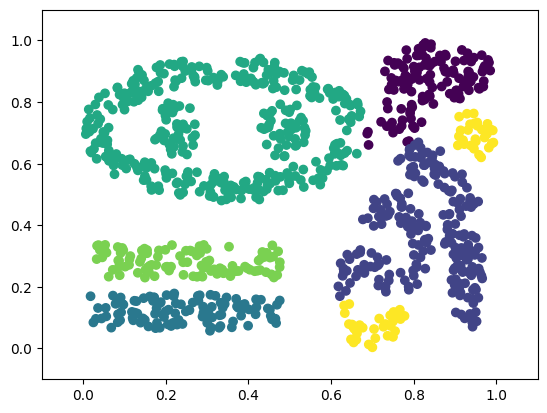

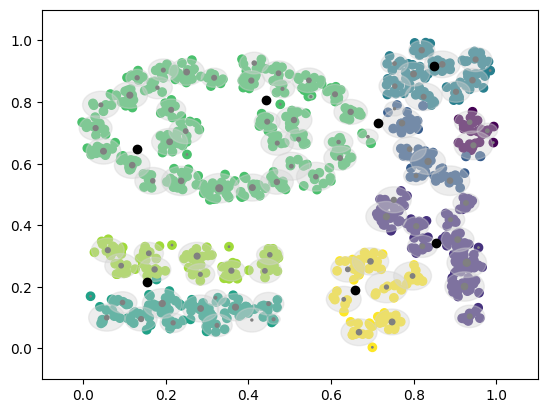

In [82]:
dbhd = DBHD(min_cluster_size=50)
dbhd_trueclustering = dbhd.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=dbhd_trueclustering)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()

dbhd = DBHD(min_cluster_size=50)
dbhd_offclustering = dbhd.fit_predict(new_ds[:, 0:2])
plt.scatter(new_ds[:, 0], new_ds[:, 1], c=dbhd_offclustering)
for mc in clustream_mcs:
	mc_patch = ptc.Circle((mc[0],mc[1]), 2* mc[2], alpha= 0.4, color="lightgrey")
	plt.gca().add_patch(mc_patch)
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c="black")
plt.scatter(clustream_mcs[:, 0], clustream_mcs[:,1], c="grey", s=clustream_mcs[:,3])
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
plt.show()